# Multivariate exploratory analysis of S&P 500 stocks by sector



This assignment will have you expand on the previous assignment. Here, you will perform a multivariate exploratory and diagnostic analysis of the S&P 500 stocks by sector. The objectives are to visualize statistical relationships and perform automatic diagnostic analysis with PCA. This will allow us to identify which factors, stocks and sectors might warrant additional exploration particularly when we look at modeling for regression and classification later on.

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
%load_ext google.colab.data_table

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import pytz
import datetime as dt
import streamlit as st

* In the code below, we webscrape the SP500 table. This table contains the following information which you will use for the assignment:
  * Symbol
  * Security which is the company name
  * GICS Sector

You will need to use the symbols to query the stock prices using the pandas datareader package. The documentation for the package can be found here:
* [pandas_datareader Remote Data Access](https://pydata.github.io/pandas-datareader/stable/remote_data.html).
* [RIP Tutorial Datareader Basic Example (Yahoo Finance)](https://riptutorial.com/pandas/example/6232/datareader-basic-example--yahoo-finance-)

Run the following code to load the data.



In [ ]:
sp_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp_table = sp_data[0]
sp_table

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


## Question 1: Scatterplot Matrices

One of the first steps in multivariate analysis is to look at correlations.

**Create a scatterplot matrix of monthly log return correlations between each sector:**
* Use the sector index ticker symbols to fetch the sector prices. The sector tickers are provided below.  
* Compute the log returns.
* Plot the scatterplot matrix showing the pairwise relationships between log returns for each sector. Apply the appropriate transformations prior to plotting.
* Parameterize the plot to allow for date range filters

The sectors corresponds to the GICS sector classifications for the SP500 companies in the table above. Depending on the date ranges you specify, the relationship between returns can often approach near perfect correlation. Such instances occur when there are financial crises or global pandemics as all the sectors tend to drop in unison. Try moving the date ranges to the first month of Covid-19 or to the first year of the global financial crisis and observe how correlation changes.


In [ ]:
start_date = "2008-01-01" #@param {type: "date"}
end_date = "2022-01-01" #@param {type: "date"}

In [ ]:
# Ticker symbols you will need
market_ticker = "SPY"

yfin.pdr_override()

sector_tickers = [ "XLE", #energy
             "XLB",  #materials
             "XLI", #industrials
             "XLY", #discretionary
             "XLP", #staples
             "XLV", #health care
             "XLF", #financials
             "XLK", #information tech
             "XLC", #telecommunications
             "XLU", #utilities
             "XLRE" #Real estate
             ]
sector_price_data = pdr.get_data_yahoo(sector_tickers,
                       start=start_date,
                       end=end_date)


[*********************100%%**********************]  11 of 11 completed


In [ ]:
market_ticker = pdr.get_data_yahoo(market_ticker,
                       start=start_date,
                       end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
sector_price_data

Adj Close                                               \
                  XLB        XLC        XLE        XLF         XLI   
Date                                                                 
2008-01-02  29.245987        NaN  48.961124  16.860104   28.011919   
2008-01-03  29.777084        NaN  49.540047  16.753094   28.033739   
2008-01-04  28.877783        NaN  47.729393  16.277485   27.459118   
2008-01-07  28.481209        NaN  47.544636  16.319101   27.117228   
2008-01-08  28.042166        NaN  46.713226  15.724602   26.513496   
...               ...        ...        ...        ...         ...   
2021-12-27  86.401611  77.589272  52.398037  37.885925  101.978386   
2021-12-28  86.902832  77.549927  52.360680  37.905251  102.493042   
2021-12-29  87.259468  77.166260  52.024437  37.856945  102.677551   
2021-12-30  86.951027  77.490891  51.706867  37.789333  102.308556   
2021-12-31  87.336571  76.418587  51.837631  37.721718  102.745514   

                                                                     ...  \
                   XLK        XLP       XLRE        XLU         XLV  ...   
Date                                                                 ...   
2008-01-02   20.799192  18.599905        NaN  23.958302   26.536360  ...   
2008-01-03   20.831036  18.501631        NaN  23.924139   26.695845  ...   
2008-01-04   20.018818  18.423016        NaN  24.106298   26.422432  ...   
2008-01-07   19.843639  18.639214        NaN  24.607208   26.946478  ...   
2008-01-08   19.318085  18.501631        NaN  24.612894   27.166733  ...   
...                ...        ...        ...        ...         ...  ...   
2021-12-27  173.810303  72.757774  48.036732  66.446495  136.950150  ...   
2021-12-28  172.905090  73.169167  48.244186  67.044006  136.590195  ...   
2021-12-29  173.052689  73.504005  48.536522  67.404419  137.368454  ...   
2021-12-30  171.911346  73.274391  48.753418  67.651001  137.650604  ...   
2021-12-31  171.075012  73.771889  48.857143  67.888115  137.066895  ...   

               Volume                                                    \
                  XLC       XLE        XLF       XLI      XLK       XLP   
Date                                                                      
2008-01-02        NaN  19295700   80446096   7781500  7460600  10122700   
2008-01-03        NaN  14605400   55290488   5334700  2011000   4379600   
2008-01-04        NaN  26878000   93318540  12500300  3892000   4172500   
2008-01-07        NaN  32408800  112017799   8542800  5599200   3826400   
2008-01-08        NaN  22607900  148535168  10547800  5294900   5549600   
...               ...       ...        ...       ...      ...       ...   
2021-12-27  2667600.0  21742200   36120300   5196000  6633300   7343200   
2021-12-28  3214700.0  17938500   34055200   5368600  5711100   7285200   
2021-12-29  3775600.0  15109100   27150500   5922300  4843900   7891600   
2021-12-30  4483500.0  13590000   30089100   6190400  5263200   6802800   
2021-12-31  5689100.0  13241200   28497800   7726100  5121500  11289000   

                                                  
                 XLRE      XLU      XLV      XLY  
Date                                              
2008-01-02        NaN  4998900  6611300  3901000  
2008-01-03        NaN  5143600  2544400  9587000  
2008-01-04        NaN  7023300  3270600  5985100  
2008-01-07        NaN  9154500  5457900  6121900  
2008-01-08        NaN  9603900  6231200  4300200  
...               ...      ...      ...      ...  
2021-12-27  5183100.0  7853700  6968900  4214000  
2021-12-28  5592700.0  8052000  6065900  4153100  
2021-12-29  4404700.0  6877700  7103600  3792300  
2021-12-30  3665900.0  9336200  7931700  3570100  
2021-12-31  3979100.0  9309400  7882800  3442800  

[3526 rows x 66 columns]

## Question 1 Answer:

In [ ]:
## Plot the scatterplot matrix between all the sectors with each other
## Your code here

## Step 1: Convert the sector_price_data prices to log returns

multpl_stock_monthly_returns = sector_price_data.resample('M').ffill().pct_change()
multpl_stock_monthly_returns = multpl_stock_monthly_returns.dropna(how='all').dropna(axis=1)
multpl_stock_monthly_returns



Adj Close                                                    \
                 XLB       XLE       XLF       XLI       XLK       XLP   
Date                                                                     
2008-02-29  0.023029  0.092672 -0.113589 -0.020271 -0.047312 -0.002573   
2008-03-31 -0.014058 -0.023363 -0.029402  0.036307  0.011561  0.032398   
2008-04-30  0.053273  0.103835  0.069964  0.029412  0.062500 -0.007538   
2008-05-31  0.051998  0.051988 -0.069523  0.008831  0.065126  0.030380   
2008-06-30 -0.058163  0.031554 -0.174494 -0.120255 -0.093674 -0.056995   
...              ...       ...       ...       ...       ...       ...   
2021-08-31  0.018924 -0.020045  0.051479  0.011126  0.035593  0.010488   
2021-09-30 -0.071886  0.089315 -0.018425 -0.060798 -0.058399 -0.041392   
2021-10-31  0.075970  0.103283  0.072742  0.067968  0.081771  0.035009   
2021-11-30 -0.005522 -0.050113 -0.057129 -0.035601  0.044512 -0.013474   
2021-12-31  0.075832  0.029834  0.033643  0.053976  0.032474  0.104547   

                                             Close  ...      Open    Volume  \
                 XLU       XLV       XLY       XLB  ...       XLY       XLB   
Date                                                ...                       
2008-02-29 -0.041051 -0.026706 -0.038674  0.023029  ...  0.029155 -0.233569   
2008-03-31  0.016053 -0.045441 -0.017865 -0.017127  ... -0.042493  0.201980   
2008-04-30  0.051133  0.009945  0.023763  0.053274  ...  0.074622 -0.261091   
2008-05-31  0.035858  0.019060  0.027345  0.051997  ... -0.001224 -0.083616   
2008-06-30 -0.007463 -0.042310 -0.115343 -0.062458  ... -0.101685  0.463669   
...              ...       ...       ...       ...  ...       ...       ...   
2021-08-31  0.038957  0.023156  0.017846  0.018924  ...  0.016350 -0.050446   
2021-09-30 -0.060932 -0.055184 -0.021408 -0.075926  ... -0.004690  1.022736   
2021-10-31  0.047433  0.051218  0.120925  0.075970  ...  0.086675 -0.594609   
2021-11-30 -0.017038 -0.030564  0.016356 -0.005522  ...  0.042503  1.759403   
2021-12-31  0.096893  0.090199  0.001498  0.070408  ... -0.008125 -0.730977   

                                                                        \
                 XLE       XLF       XLI       XLK       XLP       XLU   
Date                                                                     
2008-02-29 -0.130880 -0.230136 -0.291558 -0.256572  0.453430  1.304705   
2008-03-31  0.055119 -0.371921 -0.350186  0.293468 -0.537388 -0.614413   
2008-04-30  0.116127 -0.018184  0.784777 -0.435360  0.281417 -0.031201   
2008-05-31  0.094471 -0.256542 -0.465820 -0.165275 -0.114996 -0.094001   
2008-06-30  0.116840  1.284548  0.485836  0.739578 -0.036563  1.103061   
...              ...       ...       ...       ...       ...       ...   
2021-08-31  0.086140 -0.047897 -0.249774  1.164886 -0.227486 -0.106273   
2021-09-30  0.655717  0.470026  1.559379  0.520896  1.023131  0.202053   
2021-10-31 -0.506744 -0.425908 -0.722567 -0.397533 -0.501516 -0.017530   
2021-11-30  1.102923  1.880920  2.082558  1.685642  1.925876  0.823353   
2021-12-31 -0.713778 -0.764993 -0.633118 -0.810549 -0.523974 -0.617078   

                                
                 XLV       XLY  
Date                            
2008-02-29  0.034345  0.153082  
2008-03-31 -0.149359 -0.431452  
2008-04-30 -0.475821  0.196767  
2008-05-31 -0.205237 -0.533683  
2008-06-30  0.676071  0.672408  
...              ...       ...  
2021-08-31  0.401649  0.024531  
2021-09-30  1.328516  0.725612  
2021-10-31 -0.288088 -0.484014  
2021-11-30  0.262853  2.106977  
2021-12-31 -0.595069 -0.739531  

[167 rows x 54 columns]

KeyboardInterrupt: ignored

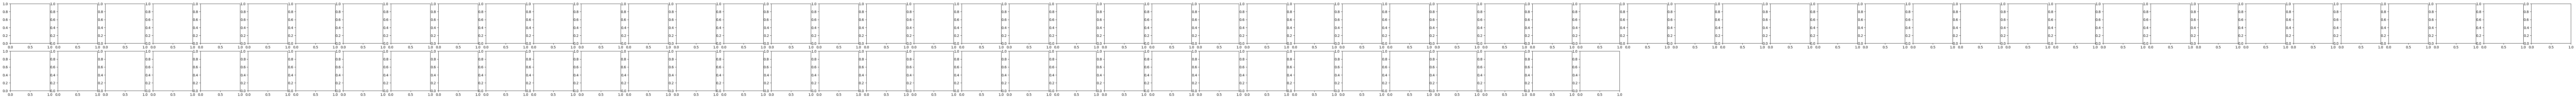

In [ ]:
## Step 2: Create a scatterplot matrix

import seaborn as sns
sns.pairplot(multpl_stock_monthly_returns)

## Question 2:

* Create a scatterplot between the S&P500 (ticker SPY) monthly log returns and the sector monthly log returns.
* The sector to be plotted against the S&P 500 should be selectable via a dropdown menu.
* The starting and ending dates should have a date selector as well.
* On the same plot, plot the estimated linear regression line

## Question 2 Answer:

In [ ]:
sector = "XLE" #@param [ "XLE", "XLB", "XLI", "XLY", "XLP", "XLV", "XLF", "XLK", "XLC", "XLU", "XLRE"]{type:"string"}
start_date = "2000-01-01" #@param {type: "date"}
end_date = "2022-01-01" #@param {type: "date"}

## Principal Components Analysis

The overall market index returns are really just a combination of its underlying individual stock returns. The S&P 500 index is the market capitalization weighted performance of its constituent stocks. While the analysis in this assignment and the previous assignment have focused at the sector level, we really would like to go one level deeper and understand how individual stock performance contributed to overall market variance.



Principal components analysis (PCA) is a classical dimensionality reduction method used in feature selection for large datasets. (We assume you have covered PCA in another class so the following exercises should be a review walkthrough.) In our case, we would like estimate the contribution of variance to the overall market returns by each individual stock. This will allow us to quickly determine the performance attribution of the SP500 by individual stocks. Once we have the individual stocks, we can join the results back to the SP500 table above to understand which sectors and stocks within those sectors lead to the biggest gains and declines over various periods.

The following questions walk you through the analysis.


### Data preparation

The following code:
* Fetches the adjusted close price of each ticker in the SP500 table.
* Calculates the daily log return

Run the code below to prepare the data. (Note: the data retrieval takes a long time.)

In [ ]:
our_ticker_list = sp_table.Symbol
print(our_ticker_list)

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object


In [ ]:
## Step 1. Pull an array of tickers from sp_table

import pytz
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
import streamlit as st
import datetime

yfin.pdr_override()

tz = pytz.timezone("America/New_York")

yfin.pdr_override()
our_ticker_list = sp_table.Symbol.tolist()

## You can pull down all the data into a dataframe in one call like this.
## Note: Several warnings will be generated if the symbol has no data. T
## This will also take a few minutes to pull all the data...

start = tz.localize(dt.datetime(2000, 1, 1))
end = tz.localize(dt.datetime(2022, 1, 1))

stock_price_data = pdr.get_data_yahoo(our_ticker_list,
                       start=start_date,
                       end=end_date)['Adj Close']

[*********************100%%**********************]  503 of 503 completed

ERROR:yfinance:
6 Failed downloads:
ERROR:yfinance:['KVUE', 'CEG', 'GEHC', 'VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1641013200")
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-01-01 -> 2022-01-01)')
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [ ]:
# ## Step 2. Now compute the log returns of the entire dataframe in one call
log_returns = stock_price_data.apply(np.log).diff(1)

## Step 3. Take care of missing values
# Feel free to perform additional data cleansing. The following code is very basic.
log_returns = log_returns.fillna(0)

<Axes: title={'center': 'Daily Returns of the Stocks in the S&P500'}, xlabel='Date'>

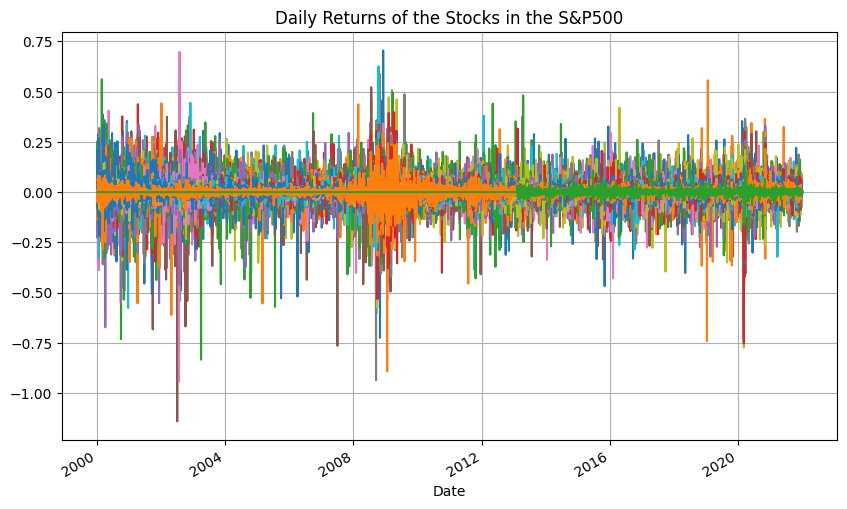

In [ ]:
## If everything executed correctly, you should now be able to plot the daily log returns as follows:
log_returns.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')


### PCA

Using the cleansed data set of daily log returns, we can now compute the PCA decomposition.


<Axes: title={'center': 'First Principal Component of the S&P500'}>

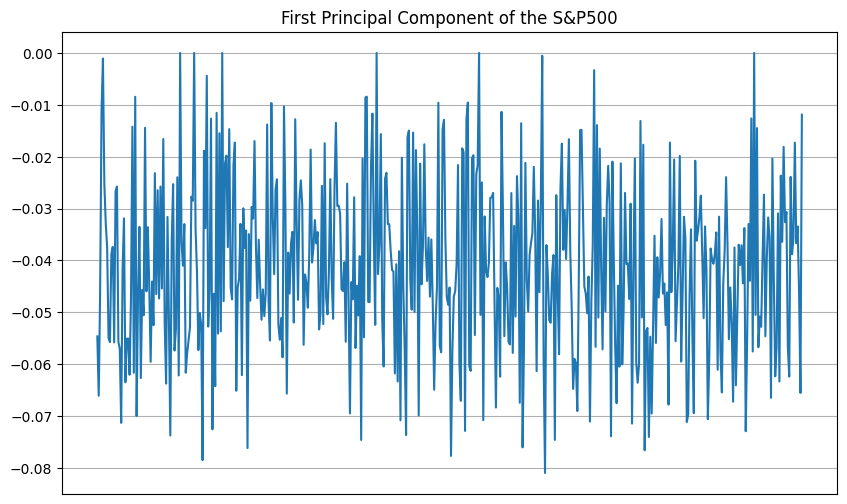

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(1).fit(log_returns)
pc1 = pd.Series(index=log_returns.columns, data=pca.components_[0])

# Lets plot the first principal component calculated
pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')



The above graph isn't very useful but we now have the principal components breakdown of the entire stock market by stock returns. You can see how much of the variance we have captured by looking at the cumulative returns determined by PCA's weightings from just the first principal component.

<Axes: xlabel='Date'>

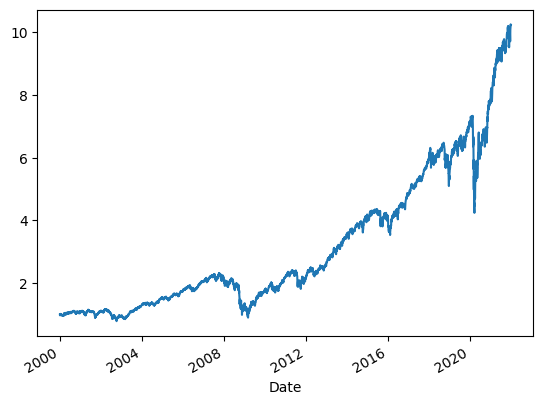

In [ ]:
weights = abs(pc1)/sum(abs(pc1))
cum_returns = (weights*log_returns).sum(1)
cum_returns.cumsum().apply(np.exp).plot()


If we plot the first principal components against the SP500 index, we should see similarities in the resulting line graph.


#### Question 3: PCA Variance Explained

If PCA worked as expected, then the calculated returns from PCA should match up to the actual returns. Essentially, PCA should be extracting the underlying elements of the data that contribute most to the variability of the dataset as a whole. These are called the factor loadings and can be used for meta analysis of large datasets.

To check that PCA performed adequately:

* **Plot the cumulative S&P 500 returns starting from the beginning of 2020 up to today's date for ticker SPY which is the S&P 500 index itself.**
* **Plot on the same graph, the cumulative returns calculated above from PCA for the same date range. `cum_returns.cumsum().apply(np.exp)` would be the applicable code.**

Hint: they should look similar but not exactly identical

The following code shows you how to compute and plot the cumulative return for SPY using matplotlib. **Use a different plotting library in your solution.**

In [ ]:
from datetime import datetime
start_date = "2020-01-01" #@param {type: "date"}
end_date = datetime.today().strftime('%Y-%m-%d') #@param {type: "date"}
yfin.pdr_override()
spy_data = pdr.get_data_yahoo("SPY",
                       start=start_date,
                       end=end_date)['Adj Close']


[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

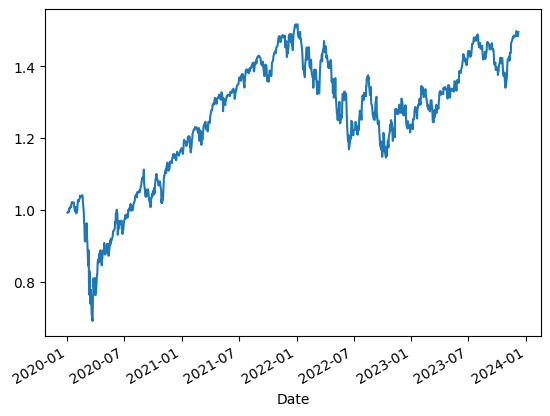

In [ ]:
#code shown as reference only! Use a different plotting library and build up the intermediate calcs appropriately
spy_data.apply(np.log).diff(1).dropna().cumsum().apply(np.exp).plot()

## Your code here for the plot

#### Question 3 Answer:

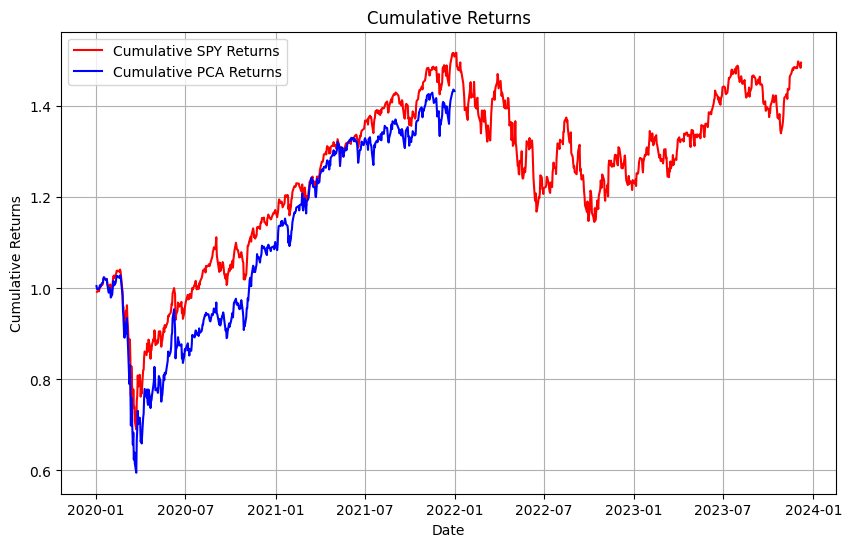

In [ ]:
##Your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate cumulative returns for S&P 500
cumulative_spy_returns = spy_data.apply(np.log).diff(1).dropna().cumsum().apply(np.exp)

# Truncate cum_returns to include only the specified date range
cum_returns_truncated = cum_returns[start_date:end_date]

# Calculate cumulative returns from principal components
cumulative_pca_returns = cum_returns_truncated.cumsum().apply(np.exp)

# Plotting
plt.figure(figsize=(10, 6))

sns.lineplot(data=cumulative_spy_returns, label='Cumulative SPY Returns', color='red')
sns.lineplot(data=cumulative_pca_returns, label='Cumulative PCA Returns', color='blue')


# Customize the plot
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()



#### Question 4:

PCA is often used to show separation in classifications due to variances in certain attributes. The common example used in most courses is estimating plant species based on petal width, sepal length, etc. See [Plotly's documentation](https://plotly.com/python/pca-visualization/) for an example using the Iris dataset.


The following code attempts to see if the returns distributions separate by industry. During different financial crises, one hypothesis might be that susceptiable industries will show similar behavior and perhaps decline faster than the other industries. These stocks should cluster together in behavior.


The code below calculates the total variance explained by PCA.

*   **Create a 3D graph of the first three principal components**
*   **Map one of the aesthetics to the GICS sector of the stock**
*   **On hover, show the stock and sector of the datapoint**





#### Question 4 Answer:

In [ ]:
from sklearn.decomposition import PCA

X = log_returns.transpose()
pca = PCA(n_components=3)
components = pca.fit_transform(X)

In [ ]:
import plotly.express as px

total_var = pca.explained_variance_ratio_.sum() * 100

In [ ]:
total_var

16.016199831703318

In [ ]:
df = pc1.to_frame().reset_index()
df.columns =['Symbol', 'Weight']

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Symbol'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

#### instructor's commments, Thank you for the excellent questions, in question #1, try to reformat and enlarge the size of charst, they look too small now.

Note: The 3D scatter may not show any clear separation by industry. Stock performance is not just a function of the industry it is in, but rather a function of its cash flow and operating performance. So, it makes sense that there may be no clear clustering or groupings. You can play with the date range of the data to see if the groupings by industry begin to converge.



#### Question 5:

Another way we can utilize the PCA calculation is to look at the weightings from PCA to rank the performance of individual stocks without *any* knowledge of the company fundamentals or financial history.

For the date range starting from the beginning of 2020 to 2021, **take the top 10 largest and top ten smallest PCA weights for the first principal component and create 2 horizontal bar plots:**

Use these to create 2 horizontal bar plots with sortings by weight.
Take a moment to think about what this principal component tells you about the economic environment around 2020.


#### Question 5 Answer Optional:

In [ ]:
# Question 5 bar plot code here

In [ ]:
log_returns
import datetime
new_log_return = log_returns.reset_index()

In [ ]:
new_log_return.columns

In [ ]:
import datetime
new_log_return['Date'] = pd.to_datetime(new_log_return['Date'])
new_log_return['year'], new_log_return['month'] = new_log_return['Date'].dt.year, new_log_return['Date'].dt.month

In [ ]:
year_log_return = new_log_return[(new_log_return['year'] == 2020)|(new_log_return['year'] == 2021)]

In [ ]:
year_log_return_new = year_log_return.drop(['year','month','Date'], axis=1)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(1).fit(year_log_return_new)
pc1 = pd.Series(index=year_log_return_new.columns, data=pca.components_[0])

# Lets plot the first principal component calculated
pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')


In [ ]:
import matplotlib.pyplot as plt
df = pc1.to_frame().reset_index()
df.columns =['Symbol', 'Weight']


large10 = df.nlargest(10, "Weight")
x = list(large10.Symbol)
y = list(large10.Weight)
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.barh(x, y)

fig.show()

In [ ]:
import matplotlib.pyplot as plt
df = pc1.to_frame().reset_index()
df.columns =['Symbol', 'Weight']


small10 = df.nsmallest(10, "Weight")

x = list(small10.Symbol)
y = list(small10.Weight)
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.barh(x, y)

fig.show()

#### Question 6:

The bar plots above give an indication about what companies fared well or fared poorly during Covid-19 (given the date range of the computation). We are now interested in what industries performed well or poorly.

* **Create a bar chart showing the average first principal component PCA weight by sector**

#### Question 6 Answer Optional:

In [ ]:
# Question 6 code here

## Assignment comments
What you have just created is an interactive notebook that lets anyone view stock market returns by stock, sector, and date as:
* scatterplot matrices showing aggregate relationships
* PCA decomposition showing attribution
* barplot rankings by sector impact

With this notebook, you can now explore relationships between sectors and their constituent stocks through time to understand how global events impacts multiple variables at once in a visual framework. This multivariate descriptive and exploratory visualization is a typical analytical workflow when developing models for prediction or classification.

